# Properties and Applications of the 2D Fourier Transform

The packages imported were the following:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import numpy.fft as fft
from skimage import io
import scipy.signal
%matplotlib inline

This is the function I made to perform the fourier transform of the images as well as show the comaprison between the original image and the fourier transform of the image. 

In [5]:
def fourier_transform(image):
    plt.figure(figsize=(12,8))
    plt.subplot(121)
    plt.imshow(image, cmap='gray')
    plt.title('Image')
    fourier = fft.fft2(image)
    Image = fft.fftshift(fourier)
    plt.subplot(122)
    plt.imshow(abs(Image), cmap='gray')
    plt.title('FT of image')

# Activity 1: Anamorphic Property of FT of different 2D patterns

(a) Tall rectangular aperture

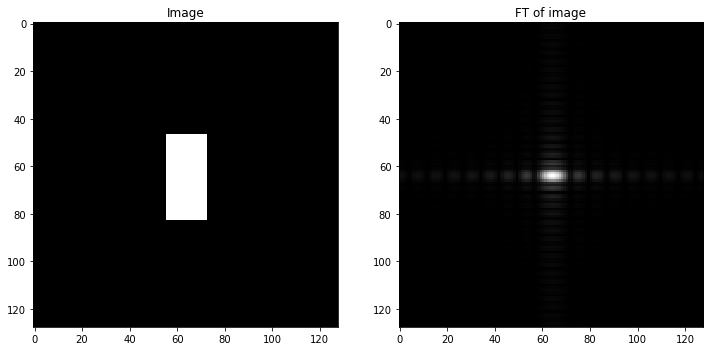

In [6]:
tall_rec_ap = io.imread('tall_rec_ap.png', as_grey=True)
fourier_transform(tall_rec_ap)

The fourier transform of a tall rectangular aperture appears to be wider or horizontally stretched.

(b) wide rectangular aperture

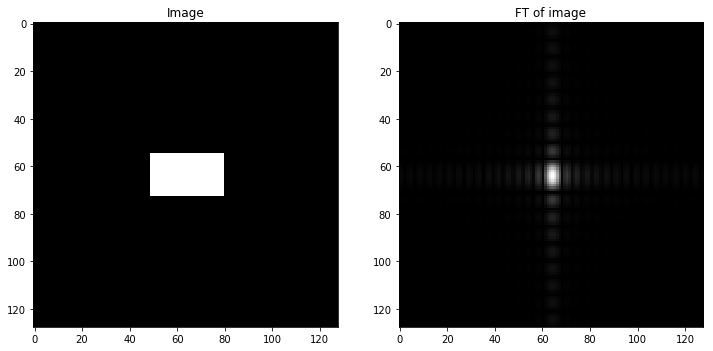

In [7]:
wide_rec_ap = io.imread('wide_rec_ap.png', as_grey=True)
fourier_transform(wide_rec_ap)

The fourier transform of a wide rectangular aperture appears to be taller or vertically stretched. These kinds of behavior exhibit the anamorphism brought about by the fourier transform. A longer dimension in space has a smaller dimension in Fourier space. 

(c) Two dots along x-axis symmetric about the center

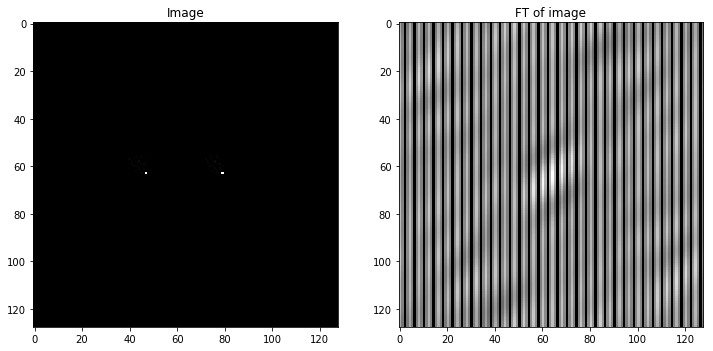

In [9]:
two_dots_sym = io.imread('dots.jpg', as_grey=True)
fourier_transform(two_dots_sym)

(d) Same as (c) with different spacing between the dots.

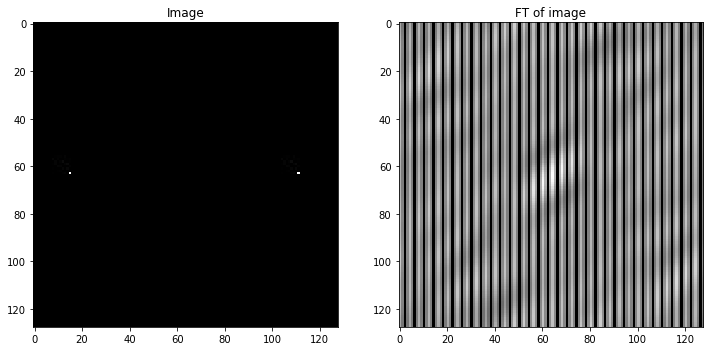

In [10]:
two_dots_anti = io.imread('dots2.jpg', as_grey=True)
fourier_transform(two_dots_anti)

# Activity 2. Rotation Property of the FT

FOURIER TRANSFORMS OF SINUSOIDS AT VARYING FREQUENCIES

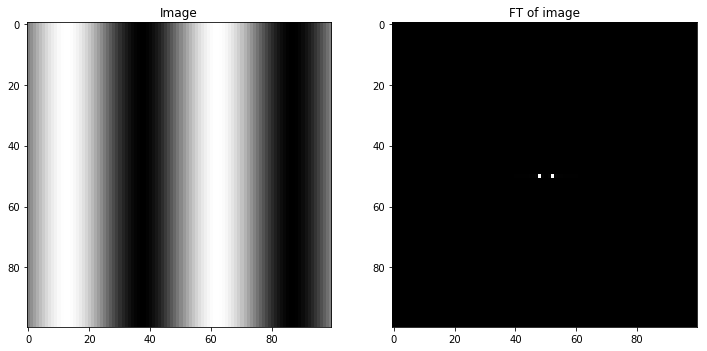

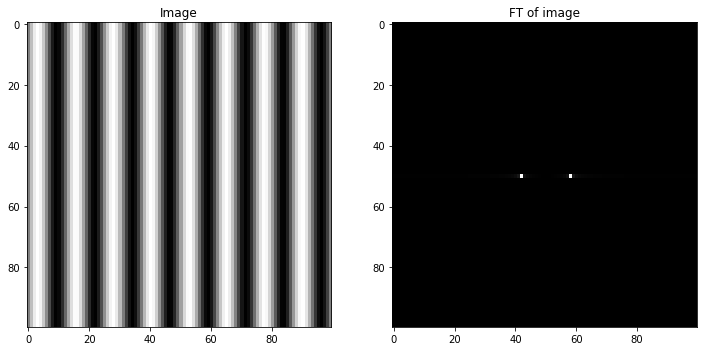

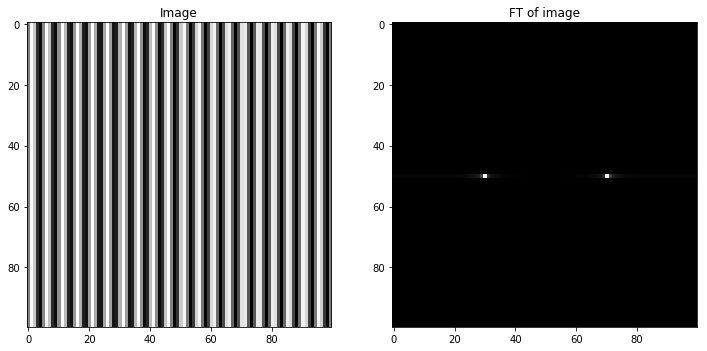

In [35]:
nx = 100
ny = 100
x = np.linspace(-1,1,nx)
y = np.linspace(-1,1,ny)
X,Y = np.meshgrid(x,y)

def sine(f,X):
    return np.sin(2*np.pi*f*X)

fourier_transform(sine(1,X))
fourier_transform(sine(4,X))
fourier_transform(sine(10,X))

From the figures above, it can be observed that the fourier transform of a sinusoid are two dots symmetric at the center. When the frequency is increased, the dots move farther apart. 

FOURIER TRANSFORM OF SINUSOID WITH CONSTANT BIAS

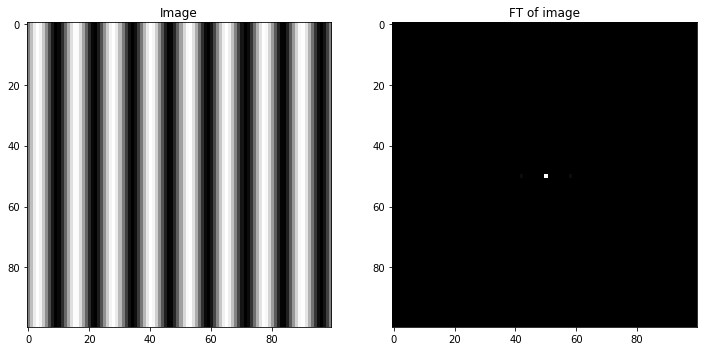

In [36]:
bias = sine(4,X)+10
fourier_transform(bias)

When there is a constant bias, the fourier transform of a sinusoid becomes a single dot at the center of the image. This is due to the bias having a frequency of zero. 

FOURIER TRANSFORM OF A ROTATED SINUSOID

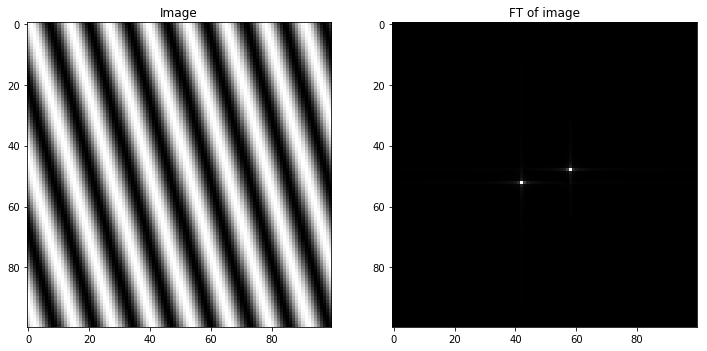

In [37]:
def rotated(f,theta,X,Y):
    return np.sin(2*np.pi*f*(Y*np.sin(theta) + X*np.cos(theta)))

fourier_transform(rotated(4,50,X,Y))

The fourier transform of a rotated sinusoid is similar to the FT of a normal sinusoid with the dots also being rotated by the angle introduced into the sinusoid.

FOURIER TRANSFORM OF A COMBINATION OF SINUSOIDS IN X AND Y

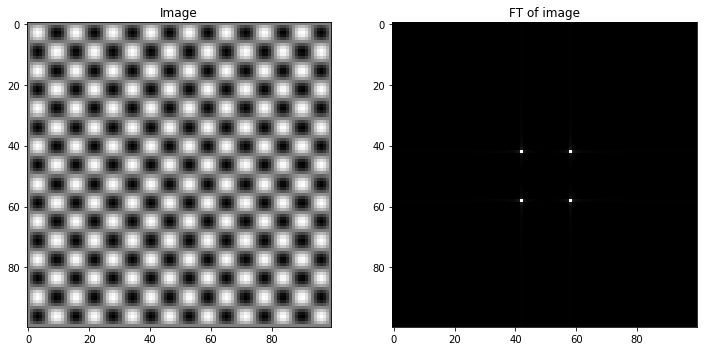

In [38]:
z2 = np.sin(2*np.pi*4*X)*np.sin(2*np.pi*4*Y)
fourier_transform(z2)

When we multiplied two sinusoids, we obtained four peaks. Note that a product of sines can be decomposed to a sum of sines, which explains the 4 peaks we observed.

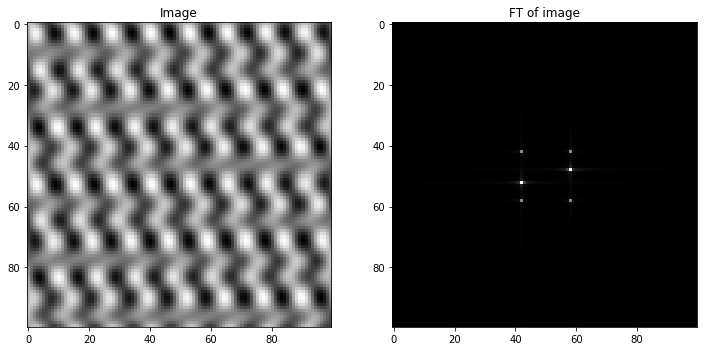

In [39]:
z3 = np.sin(2*np.pi*4*X)*np.sin(2*np.pi*4*Y) + rotated(4,50,X,Y) 
fourier_transform(z3)

Taking the fourier transform of the sum of a combination of sinusoids in X and Y and a rotated sinusoid results in the addition of their fourier transforms, which can be observed using the previous examples. 

# Activity 3. Convolution Theorem Redux

FOURIER TRANSFORM OF TWO DOTS (ONE PIXEL EACH)

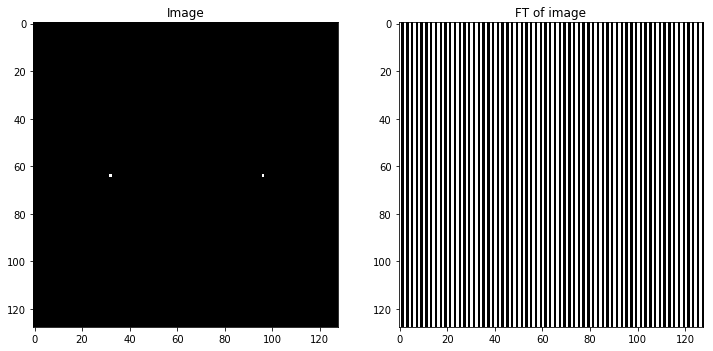

In [41]:
n = 128
x1 = np.linspace(-1,1,n)
y1 = np.linspace(-1,1,n)
X1,Y1 = np.meshgrid(x1,y1)

dots = np.zeros((n,n))
dots[64,32] = 1
dots[64,96] = 1

fourier_transform(dots)

The analytical fourier transform of a dirac delta function is a complex exponential, which explains the periodic fourier transform image we observed.

FOURIER TRANSFORM OF TWO CIRCLES OF SOME RADIUS

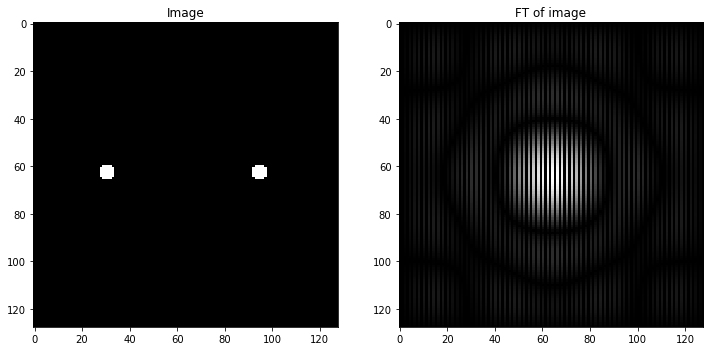

In [42]:
circles =  io.imread('2circles.png', as_grey=True)
fourier_transform(circles)

The fourier transfrom of two circles resulted in an airy pattern with fringes. The fringes are similar to the result of the double slit. It is expected due to the intereference of the waves passing through the two circles. 

FOURIER TRANSFORM OF TWO SQUARES OF SOME WIDTH 

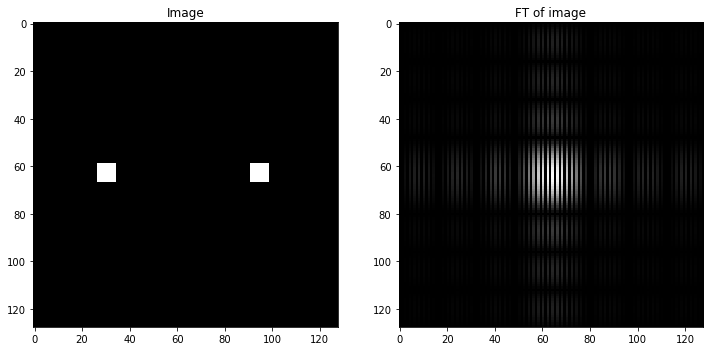

In [43]:
squares =  io.imread('2square.png', as_grey=True)
fourier_transform(squares)

FOURIER TRANSFORMS OF TWO GAUSSIANS AT VARYING VARIANCES

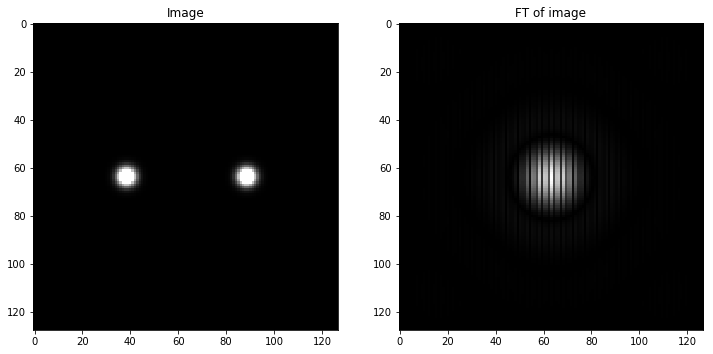

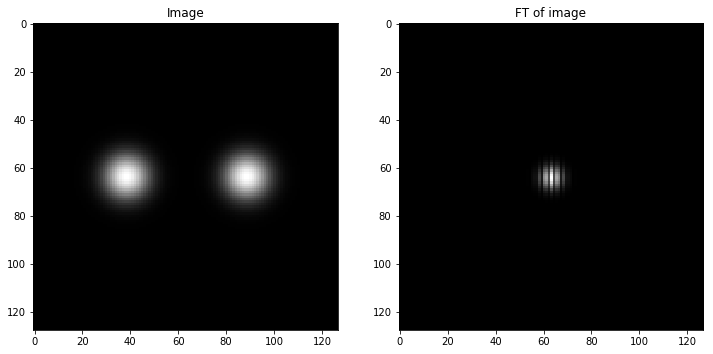

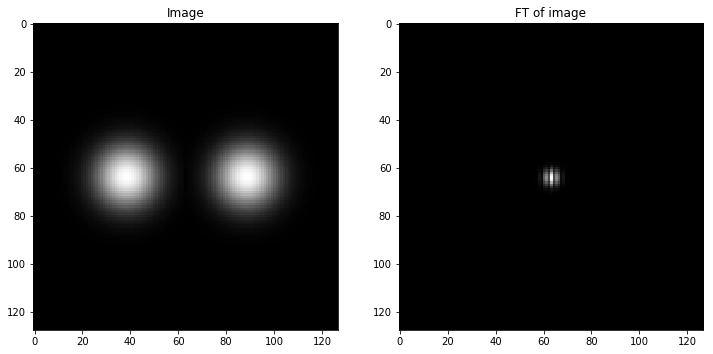

In [51]:
gaussians =  io.imread('2Gaus.png', as_grey=True)
fourier_transform(gaussians)
gaussians2 = io.imread('2Gausv2.png', as_grey=True)
fourier_transform(gaussians2)
gaussians3 = io.imread('2Gausv3.png', as_grey=True)
fourier_transform(gaussians3)

The fourier transform of two Gaussians resulted in a Gaussian with fringes. Due to the anamorphic property of the fourier transform, the width of the resulting Gaussian decreases as the width of the two Gaussians increased.

CONVOLUTION OF TEN 1'S IN RANDOM LOCATIONS OF A 200X200 ARRAY WITH DIFFERENT PATTERNS

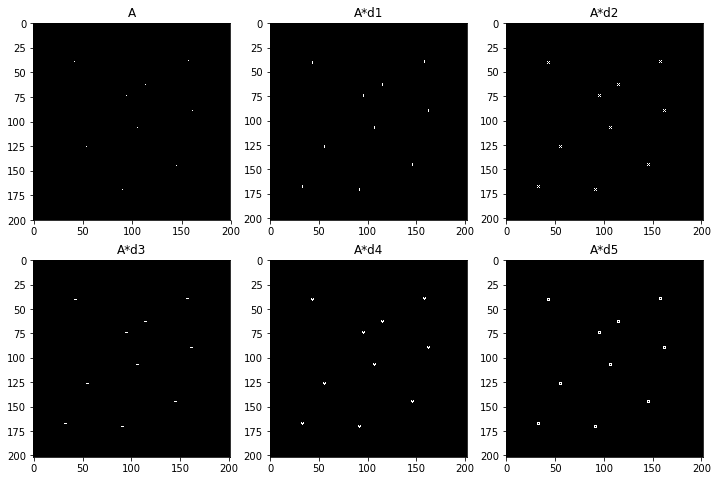

In [45]:
A = io.imread('random.png', as_grey=True)
plt.figure(figsize=(12,8))
plt.subplot(231)
plt.imshow(A, cmap='gray')
plt.title('A')

pattern1 = np.array([[0,1,0],[0,1,0],[0,1,0]])

pattern2 = np.array([[1,0,1],[0,1,0],[1,0,1]])

pattern3 = np.array([[0,0,0],[1,1,1],[0,0,0]])

pattern4 = np.array([[1,0,1],[1,1,1],[0,1,0]])

pattern5 = np.array([[1,1,1],[1,0,1],[1,1,1]])

plt.subplot(232)
plt.imshow(scipy.signal.convolve(A,pattern1), cmap='gray')
plt.title('A*d1')

plt.subplot(233)
plt.imshow(scipy.signal.convolve(A,pattern2), cmap='gray')
plt.title('A*d2')

plt.subplot(234)
plt.imshow(scipy.signal.convolve(A,pattern3), cmap='gray')
plt.title('A*d3')

plt.subplot(235)
plt.imshow(scipy.signal.convolve(A,pattern4), cmap='gray')
plt.title('A*d4')

plt.subplot(236)
plt.imshow(scipy.signal.convolve(A,pattern5), cmap='gray')
plt.title('A*d5')

Applying convolution to the random points and different patterns resulted in the points copying the pattern it was convolved with. 

FOURIER TRANSFORM OF EQUALLY SPACED 1'S ALONG THE X AND Y AXIS OF A 200X200 ARRAY

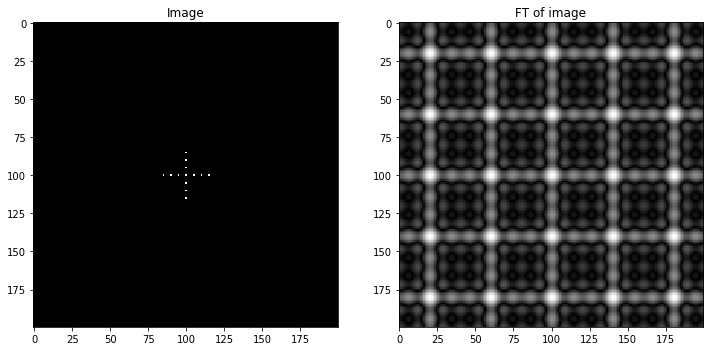

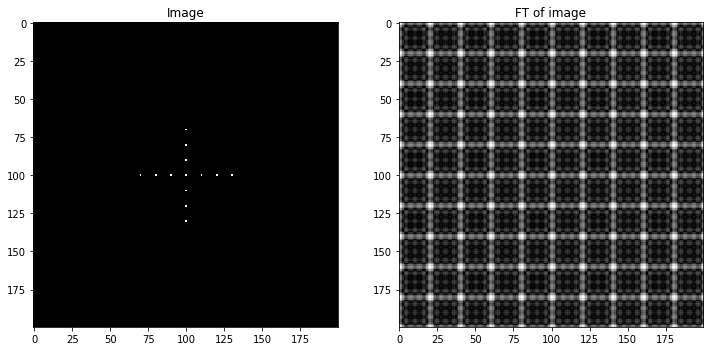

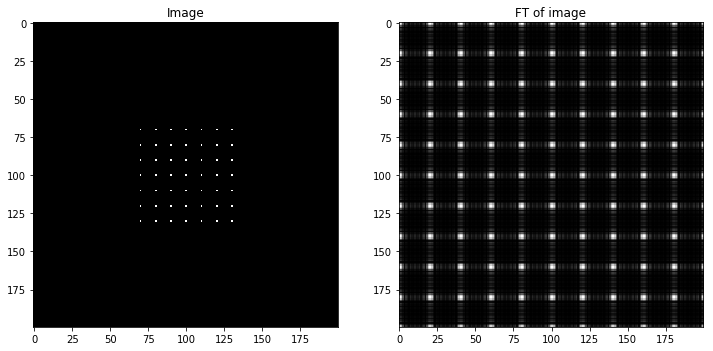

In [46]:
equal = io.imread('equal.png', as_grey=True)
fourier_transform(equal)
equal1 = io.imread('equal1.png', as_grey=True)
fourier_transform(equal1)
equal2 = io.imread('equal2.png', as_grey=True)
fourier_transform(equal2)

The fourier transform of the images are very ordered and also equally spaced just like the original image. As the spacing between the dots increased, the spacing in the fourier transform output decreases. 

# Activity 4. Fingerprints : Ridge Enhancement

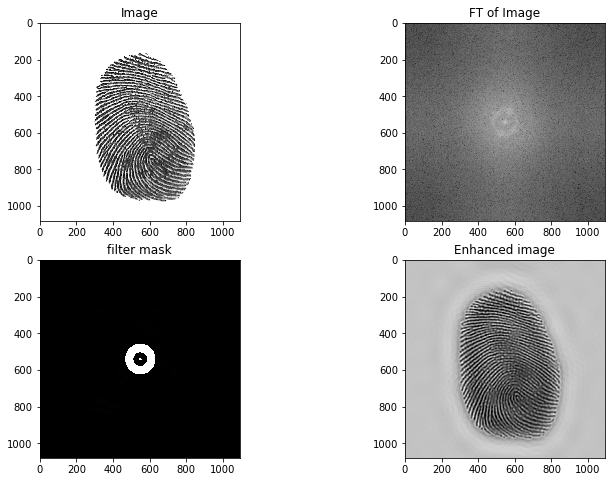

In [47]:
fingerprint = io.imread('fingerprint.jpg', as_grey=True)
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.imshow(fingerprint, cmap='gray')
plt.title('Image')
f_finger = fft.fft2(fingerprint)
Fingerprint = fft.fftshift(f_finger)
plt.subplot(222)
plt.imshow(np.log(abs(Fingerprint)), cmap='gray')
plt.title('FT of Image')

mask_finger = io.imread('mask.png', as_grey=True)
plt.subplot(223)
plt.imshow(mask_finger, cmap='gray')
plt.title('filter mask')
finger_mask = fft.fft2(Fingerprint*mask_finger)
plt.subplot(224)
plt.imshow(np.flipud(np.fliplr(abs(finger_mask))), cmap='gray')
plt.title('Enhanced image')

To enhance the ridges from the fingerprint, I took the fourier transform of the fingerprint image. A pattern was observed in the fourier transformed image, which was suspected to be the features of the fingerprint. A mask was created and convolved with the original image to retain the features (ridges) and remove other features of the image. 

# Activity 5. Lunar Landing Scanned Pictures : Line removal

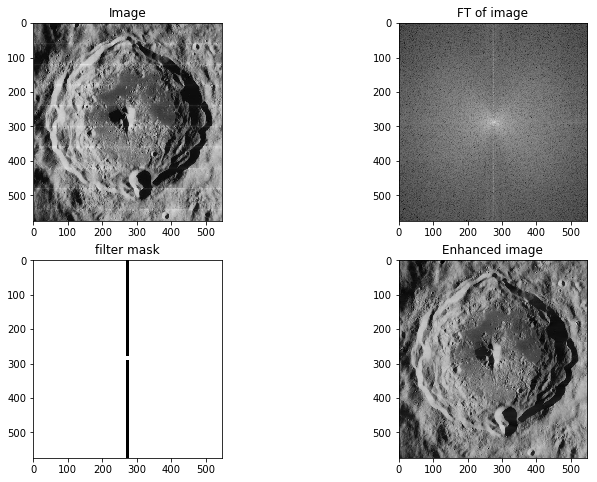

In [49]:
lunar =  io.imread('lunar.jpg', as_grey=True)
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.imshow(lunar, cmap='gray')
plt.title('Image')
f_lunar = fft.fft2(lunar)
Lunar = fft.fftshift(f_lunar)
plt.subplot(222)
plt.imshow(np.log(abs(Lunar)), cmap='gray')
plt.title('FT of image')

mask_lunar = io.imread('lunar_mask.png', as_grey=True)
plt.subplot(223)
plt.imshow(mask_lunar, cmap='gray')
plt.title('filter mask')
Lunar_mask = fft.fft2(Lunar*mask_lunar)
plt.subplot(224)
plt.imshow(np.flipud(np.fliplr(abs(Lunar_mask))), cmap='gray')
plt.title('Enhanced image')

To remove the lines from the lunar landing image, I took the fourier transform of the image. A mask was created based on the features observed from the FT image. Since we want to remove the lines, we blocked off the white line along the vertical of the fourier transformed image. Applying the mask to the image, it can be seen that the lines on the image disappeared. 

# Activity 6. Canvas Weave Modeling and Removal

Applying the same procedure as with the lunar landing images, I took the fourier transform of the image and took note of the features (white spots or lines). I blocked off these features to create a mask and applied it to the picture. The resulting image seem to have lessened canvas weave features.

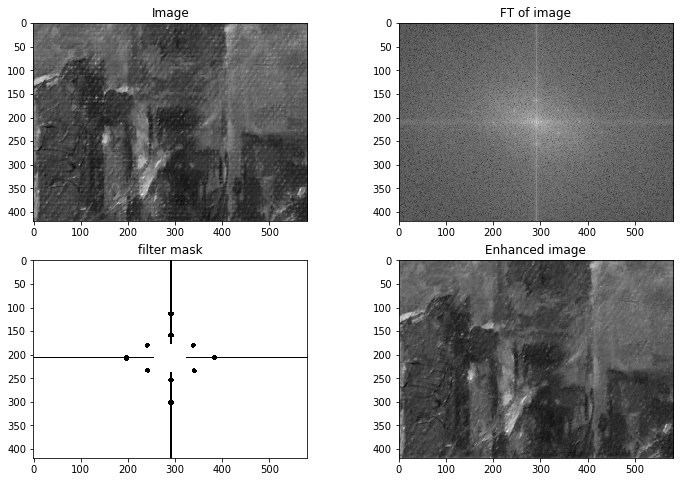

In [50]:
canvas =  io.imread('canvasweave.JPG', as_grey=True)
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.imshow(canvas, cmap='gray')
plt.title('Image')
f_canvas = fft.fft2(canvas)
Canvas = fft.fftshift(f_canvas)
plt.subplot(222)
plt.imshow(np.log(abs(Canvas)), cmap='gray')
plt.title('FT of image')

mask_canvas = io.imread('canvas_mask.png', as_grey=True)
plt.subplot(223)
plt.imshow(mask_canvas, cmap='gray')
plt.title('filter mask')
Canvas_mask = fft.fft2(Canvas*mask_canvas)
plt.subplot(224)
plt.imshow(np.flipud(np.fliplr(abs(Canvas_mask))), cmap='gray')
plt.title('Enhanced image')